<a href="https://colab.research.google.com/github/maruchang/Covid19Hackathon/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

## Read in data

In [0]:
import pandas as pd
import os

In [0]:
path = "https://raw.githubusercontent.com/maruchang/Covid19Hackathon/master/Clean_Datasets/Colleges_fall20.csv"
fall_df = pd.read_csv(path)

In [0]:
fall_df

,Unnamed: 0,Institution,Control,State,Category
0,0,Abilene Christian University,Private,TX,In-person
1,1,Academy of Art University,Private,CA,In-person
2,2,Adelphi University,Private,NY,Hybrid model
3,3,Adrian College,Private,MI,In-person
4,4,Agnes Scott College,Private,GA,In-person
...,...,...,...,...,...
975,975,Yale University,Private,CT,Undecided
976,976,Yeshiva University,Private,NY,Considering options
977,977,York College,Public,NY,In-person
978,978,York College of Pennsylvania,Private,PA,In-person


## Cleaning data

In [0]:
from collections import Counter
Counter(fall_df['Control'])

Counter({'Private': 508,
         'Private ': 2,
         'Pubic': 1,
         'Public': 468,
         'Public ': 1})

In [0]:
fall_df['Control'] = fall_df['Control'].str.strip()

In [0]:
fall_df[fall_df['Control'] == 'Pubic']

,Unnamed: 0,Institution,Control,State,Category
827,827,University of Pittsburgh,Pubic,PA,In-person


In [0]:
fall_df.loc[827, 'Control'] = 'Public'

In [0]:
Counter(fall_df['Control'])

Counter({'Private': 510, 'Public': 470})

In [0]:
most_common = Counter(fall_df['State']).most_common()[:10] # Top 10 states with the most colleges
most_common

[('CA', 113),
 ('PA', 66),
 ('TX', 55),
 ('NY', 48),
 ('MA', 44),
 ('OH', 39),
 ('MI', 37),
 ('GA', 33),
 ('VA', 32),
 ('IL', 31)]

In [0]:
Counter(fall_df['Category'])

Counter({'Considering options': 92,
         'Hybrid model': 98,
         'In-person': 631,
         'Link': 17,
         'Online': 78,
         'Undecided': 64})

In [0]:
fall_df = fall_df[fall_df['Category'] != 'Link']

In [0]:
fall_df

,Unnamed: 0,Institution,Control,State,Category
0,0,Abilene Christian University,Private,TX,In-person
1,1,Academy of Art University,Private,CA,In-person
2,2,Adelphi University,Private,NY,Hybrid model
3,3,Adrian College,Private,MI,In-person
4,4,Agnes Scott College,Private,GA,In-person
...,...,...,...,...,...
975,975,Yale University,Private,CT,Undecided
976,976,Yeshiva University,Private,NY,Considering options
977,977,York College,Public,NY,In-person
978,978,York College of Pennsylvania,Private,PA,In-person


## Visualizations

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


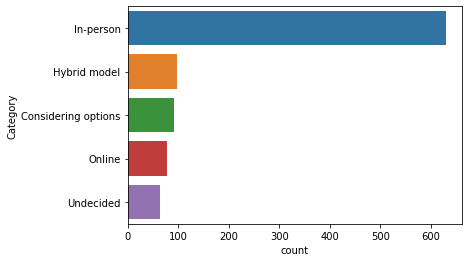

In [0]:
import seaborn as sns
sns.countplot(y='Category', data=fall_df, 
              order = fall_df['Category'].value_counts().index);

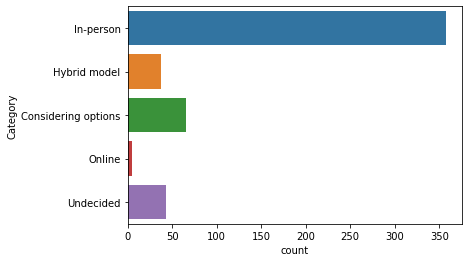

In [0]:
sns.countplot(y='Category', data=fall_df[fall_df['Control'] == 'Private'], 
              order = fall_df['Category'].value_counts().index);

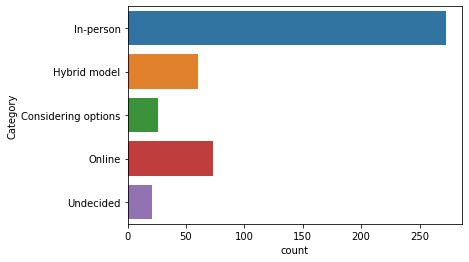

In [0]:
sns.countplot(y='Category', data=fall_df[fall_df['Control'] == 'Public'], 
              order = fall_df['Category'].value_counts().index);

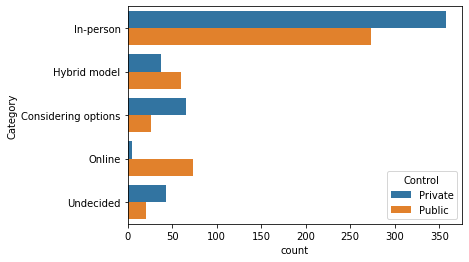

In [0]:
sns.countplot(y='Category', data=fall_df, hue='Control',
              order = fall_df['Category'].value_counts().index);

## Joining fall2020 and university data

In [0]:
uni_path = "https://raw.githubusercontent.com/maruchang/Covid19Hackathon/master/Clean_Datasets/UniversityData_clean.csv"
uni_df = pd.read_csv(uni_path)

In [0]:
uni_df.head()

,Unnamed: 0,Id,Name,County,Longitude,Latitude,Total enrollment,Control,Urbanization,Carnegie Classifation,out-of-state,foreign,Endowment
0,0,100654,Alabama A & M University,Madison County,-86.568502,34.783368,5020.0,Public,City,Master's,NaN,NaN,NaN
1,1,100663,University of Alabama at Birmingham,Jefferson County,-86.809170,33.502230,18568.0,Public,City,Research,13.0,1.0,NaN
2,2,100690,Amridge University,Montgomery County,-86.174010,32.362609,631.0,Private,City,Baccalaureatte,NaN,NaN,302.0
3,3,100706,University of Alabama in Huntsville,Madison County,-86.638420,34.722818,7376.0,Public,City,Research,14.0,4.0,NaN
4,4,100724,Alabama State University,Montgomery County,-86.295677,32.364317,6075.0,Public,City,Master's,37.0,4.0,NaN


In [0]:
pd.merge(fall_df, uni_df, left_on='Institution', right_on='Name')

,Unnamed: 0_x,Institution,Control_x,State,Category,Unnamed: 0_y,Id,Name,County,Longitude,Latitude,Total enrollment,Control_y,Urbanization,Carnegie Classifation,out-of-state,foreign,Endowment
0,0,Abilene Christian University,Private,TX,In-person,1258,222178,Abilene Christian University,Taylor County,-99.709540,32.469150,4461.0,Private,City,Master's,13.0,2.0,82162.0
1,2,Adelphi University,Private,NY,Hybrid model,783,188429,Adelphi University,Nassau County,-73.653321,40.721439,7645.0,Private,Suburb,Research,10.0,5.0,20248.0
2,3,Adrian College,Private,MI,In-person,580,168528,Adrian College,Lenawee County,-84.059947,41.898449,1658.0,Private,Town,Baccalaureatte,NaN,NaN,16118.0
3,4,Agnes Scott College,Private,GA,In-person,231,138600,Agnes Scott College,DeKalb County,-84.295630,33.769996,915.0,Private,Suburb,Baccalaureatte,37.0,15.0,281391.0
4,6,Albion College,Private,MI,In-person,581,168546,Albion College,Calhoun County,-84.746088,42.244603,1307.0,Private,Town,Baccalaureatte,NaN,NaN,121935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,974,Xavier University of Louisiana,Private,LA,Hybrid model,478,160904,Xavier University of Louisiana,Orleans Parish,-90.107307,29.964162,3121.0,Private,City,Baccalaureatte,NaN,NaN,46059.0
544,975,Yale University,Private,CT,Undecided,179,130794,Yale University,New Haven County,-72.926688,41.311158,12109.0,Private,City,Research,82.0,12.0,1528324.0
545,976,Yeshiva University,Private,NY,Considering options,900,197708,Yeshiva University,New York County,-73.928541,40.850800,6747.0,Private,City,Research,NaN,NaN,180152.0
546,977,York College,Public,NY,In-person,728,181853,York College,York County,-97.579285,40.867453,470.0,Private,Town,Baccalaureatte,64.0,1.0,23403.0


In [0]:
fall_df

,Unnamed: 0,Institution,Control,State,Category
0,0,Abilene Christian University,Private,TX,In-person
1,1,Academy of Art University,Private,CA,In-person
2,2,Adelphi University,Private,NY,Hybrid model
3,3,Adrian College,Private,MI,In-person
4,4,Agnes Scott College,Private,GA,In-person
...,...,...,...,...,...
975,975,Yale University,Private,CT,Undecided
976,976,Yeshiva University,Private,NY,Considering options
977,977,York College,Public,NY,In-person
978,978,York College of Pennsylvania,Private,PA,In-person


In [0]:
fall_df_stripped = fall_df.copy(deep=True)
fall_df_stripped['Institution_stripped'] = fall_df['Institution'].str.replace(" ", "").str.lower().str.strip()

In [0]:
uni_df_stripped = uni_df.copy(deep=True)
uni_df_stripped['Name'] = uni_df['Name'].str.replace(" ", "").str.lower().str.strip()

In [0]:
# fall_df['Institution'].value_counts()[:20]

In [0]:
# uni_df['Name'].value_counts()[:20]

In [0]:
merged_df = pd.merge(fall_df_stripped, uni_df_stripped, left_on='Institution_stripped', right_on='Name')

In [0]:
merged_df

,Unnamed: 0_x,Institution,Control_x,State,Category,Institution_stripped,Unnamed: 0_y,Id,Name,County,Longitude,Latitude,Total enrollment,Control_y,Urbanization,Carnegie Classifation,out-of-state,foreign,Endowment
0,0,Abilene Christian University,Private,TX,In-person,abilenechristianuniversity,1258,222178,abilenechristianuniversity,Taylor County,-99.709540,32.469150,4461.0,Private,City,Master's,13.0,2.0,82162.0
1,2,Adelphi University,Private,NY,Hybrid model,adelphiuniversity,783,188429,adelphiuniversity,Nassau County,-73.653321,40.721439,7645.0,Private,Suburb,Research,10.0,5.0,20248.0
2,3,Adrian College,Private,MI,In-person,adriancollege,580,168528,adriancollege,Lenawee County,-84.059947,41.898449,1658.0,Private,Town,Baccalaureatte,NaN,NaN,16118.0
3,4,Agnes Scott College,Private,GA,In-person,agnesscottcollege,231,138600,agnesscottcollege,DeKalb County,-84.295630,33.769996,915.0,Private,Suburb,Baccalaureatte,37.0,15.0,281391.0
4,6,Albion College,Private,MI,In-person,albioncollege,581,168546,albioncollege,Calhoun County,-84.746088,42.244603,1307.0,Private,Town,Baccalaureatte,NaN,NaN,121935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,974,Xavier University of Louisiana,Private,LA,Hybrid model,xavieruniversityoflouisiana,478,160904,xavieruniversityoflouisiana,Orleans Parish,-90.107307,29.964162,3121.0,Private,City,Baccalaureatte,NaN,NaN,46059.0
547,975,Yale University,Private,CT,Undecided,yaleuniversity,179,130794,yaleuniversity,New Haven County,-72.926688,41.311158,12109.0,Private,City,Research,82.0,12.0,1528324.0
548,976,Yeshiva University,Private,NY,Considering options,yeshivauniversity,900,197708,yeshivauniversity,New York County,-73.928541,40.850800,6747.0,Private,City,Research,NaN,NaN,180152.0
549,977,York College,Public,NY,In-person,yorkcollege,728,181853,yorkcollege,York County,-97.579285,40.867453,470.0,Private,Town,Baccalaureatte,64.0,1.0,23403.0


In [0]:
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Control_y', 'Name'])
merged_df.rename(columns = {'Control_x':'Control'}, inplace = True) 
merged_df

,Institution,Control,State,Category,Institution_stripped,Id,County,Longitude,Latitude,Total enrollment,Urbanization,Carnegie Classifation,out-of-state,foreign,Endowment
0,Abilene Christian University,Private,TX,In-person,abilenechristianuniversity,222178,Taylor County,-99.709540,32.469150,4461.0,City,Master's,13.0,2.0,82162.0
1,Adelphi University,Private,NY,Hybrid model,adelphiuniversity,188429,Nassau County,-73.653321,40.721439,7645.0,Suburb,Research,10.0,5.0,20248.0
2,Adrian College,Private,MI,In-person,adriancollege,168528,Lenawee County,-84.059947,41.898449,1658.0,Town,Baccalaureatte,NaN,NaN,16118.0
3,Agnes Scott College,Private,GA,In-person,agnesscottcollege,138600,DeKalb County,-84.295630,33.769996,915.0,Suburb,Baccalaureatte,37.0,15.0,281391.0
4,Albion College,Private,MI,In-person,albioncollege,168546,Calhoun County,-84.746088,42.244603,1307.0,Town,Baccalaureatte,NaN,NaN,121935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,Xavier University of Louisiana,Private,LA,Hybrid model,xavieruniversityoflouisiana,160904,Orleans Parish,-90.107307,29.964162,3121.0,City,Baccalaureatte,NaN,NaN,46059.0
547,Yale University,Private,CT,Undecided,yaleuniversity,130794,New Haven County,-72.926688,41.311158,12109.0,City,Research,82.0,12.0,1528324.0
548,Yeshiva University,Private,NY,Considering options,yeshivauniversity,197708,New York County,-73.928541,40.850800,6747.0,City,Research,NaN,NaN,180152.0
549,York College,Public,NY,In-person,yorkcollege,181853,York County,-97.579285,40.867453,470.0,Town,Baccalaureatte,64.0,1.0,23403.0


## Joining top150 and fall2020

In [0]:
top150_path = "https://raw.githubusercontent.com/maruchang/Covid19Hackathon/master/Clean_Datasets/SchoolRanking_clean.csv"

In [0]:
top150_df = pd.read_csv(top150_path)

In [0]:
top150_df_stripped = top150_df.copy(deep=True)
top150_df_stripped['Institution'] = top150_df['Institution'].str.replace(" ", "").str.lower().str.strip()

In [0]:
fall_df_stripped

,Unnamed: 0,Institution,Control,State,Category,Institution_stripped
0,0,Abilene Christian University,Private,TX,In-person,abilenechristianuniversity
1,1,Academy of Art University,Private,CA,In-person,academyofartuniversity
2,2,Adelphi University,Private,NY,Hybrid model,adelphiuniversity
3,3,Adrian College,Private,MI,In-person,adriancollege
4,4,Agnes Scott College,Private,GA,In-person,agnesscottcollege
...,...,...,...,...,...,...
975,975,Yale University,Private,CT,Undecided,yaleuniversity
976,976,Yeshiva University,Private,NY,Considering options,yeshivauniversity
977,977,York College,Public,NY,In-person,yorkcollege
978,978,York College of Pennsylvania,Private,PA,In-person,yorkcollegeofpennsylvania


In [0]:
merged_top150_fall2020 = pd.merge(top150_df_stripped, fall_df_stripped, how='left', left_on='Institution', right_on='Institution_stripped')

In [0]:
merged_top150_fall2020

,Unnamed: 0_x,Rank,Institution_x,City,State_x,Unnamed: 0_y,Institution_y,Control,State_y,Category,Institution_stripped
0,0,0,massachusettsinstituteoftechnology,Cambridge,MA,418.0,Massachusetts Institute of Technology,Private,MA,Undecided,massachusettsinstituteoftechnology
1,1,1,stanforduniversity,Stanford,CA,656.0,Stanford University,Private,CA,Hybrid model,stanforduniversity
2,2,2,harvarduniversity,Cambridge,MA,297.0,Harvard University,Private,MA,Considering options,harvarduniversity
3,3,3,yaleuniversity,New Haven,CT,975.0,Yale University,Private,CT,Undecided,yaleuniversity
4,4,4,princetonuniversity,Princeton,NJ,558.0,Princeton University,Private,NJ,Undecided,princetonuniversity
...,...,...,...,...,...,...,...,...,...,...,...
149,145,145,universityofportland,Portland,OR,828.0,University of Portland,Private,OR,In-person,universityofportland
150,146,146,universityofoklahoma,Norman,OK,823.0,University of Oklahoma,Public,OK,In-person,universityofoklahoma
151,147,147,universityofdenver,Denver,CO,747.0,University of Denver,Private,CO,In-person,universityofdenver
152,148,148,universityofsandiego,San Diego,CA,834.0,University of San Diego,Private,CA,Hybrid model,universityofsandiego


In [0]:
merged_top150_fall2020 = merged_top150_fall2020.drop(columns=['Institution_x', 'Unnamed: 0_x', 'Unnamed: 0_y', 'State_y'])
merged_top150_fall2020.rename(columns = {'Institution_y':'Institution', 'State_x':'State'}, inplace = True) 
merged_top150_fall2020.sort_values('Rank')

,Rank,City,State,Institution,Control,Category,Institution_stripped
0,0,Cambridge,MA,Massachusetts Institute of Technology,Private,Undecided,massachusettsinstituteoftechnology
1,1,Stanford,CA,Stanford University,Private,Hybrid model,stanforduniversity
2,2,Cambridge,MA,Harvard University,Private,Considering options,harvarduniversity
3,3,New Haven,CT,Yale University,Private,Undecided,yaleuniversity
4,4,Princeton,NJ,Princeton University,Private,Undecided,princetonuniversity
...,...,...,...,...,...,...,...
149,145,Portland,OR,University of Portland,Private,In-person,universityofportland
150,146,Norman,OK,University of Oklahoma,Public,In-person,universityofoklahoma
151,147,Denver,CO,University of Denver,Private,In-person,universityofdenver
152,148,San Diego,CA,University of San Diego,Private,Hybrid model,universityofsandiego


## Write out merged dataframe

In [0]:
merged_path = os.path.join(os.path.sep, 'content', 'drive', 'My Drive', 'Covid19Hackathon', 'Datasets', 'CleanedDatasets', 'merged_college_fall2020.csv')
# merged_df.to_csv(merged_path)

In [0]:
merged_top150_fall2020_path = os.path.join(os.path.sep, 'content', 'drive', 'My Drive', 'Covid19Hackathon', 'Datasets', 'CleanedDatasets', 'merged_top150_fall2020_new.csv')
# merged_top150_fall2020.to_csv(merged_top150_fall2020_path)

In [0]:
pd.set_option('display.max_rows', None)